In [1]:
import numpy as np 
import pandas as pd 
actual_duration = pd.read_csv('actual_duration.csv')
appointments_regional = pd.read_csv('appointments_regional.csv')
national_categories = pd.read_excel('national_categories.xlsx')

In [7]:
actual_duration.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [39]:
actual_duration['appointment_date'].astype('datetime64')
actual_duration.head()
print (actual_duration.dtypes)

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


In [40]:
print(actual_duration.loc[:, ['appointment_date']].apply(max, axis=0))
print(actual_duration.loc[:, ['appointment_date']].apply(min, axis=0))

appointment_date    31-May-22
dtype: object
appointment_date    01-Apr-22
dtype: object


In [8]:
appointments_regional.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [32]:
national_categories.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [41]:
#Week 3 
#Question Between what dates were appointments scheduled? 
print(national_categories.loc[:, ['appointment_date']].apply(max, axis=0))
print(national_categories.loc[:, ['appointment_date']].apply(min, axis=0))

appointment_date   2022-06-30
dtype: datetime64[ns]
appointment_date   2021-08-01
dtype: datetime64[ns]


In [101]:
#week 3 
#Question 2: Which service setting reported the most appointments in North West London from 1 January to 1 June 2022?
nc_subset_1 = national_categories.loc['2022-01':'2022-07',:]
nc_subset_1 

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month


In [92]:
nc_subset_2 = national_categories.groupby('appointment_date')
nc_subset_2

In [143]:
nc_subset_3 = national_categories.groupby(['sub_icb_location_name','appointment_date','service_setting'])['count_of_appointments'].agg('sum').reset_index()
nc_subset_x = (nc_subset_3['appointment_date']>'2022-01-01') & (nc_subset_3['appointment_date']<='2022-06-01') & (nc_subset_3['sub_icb_location_name']=='NHS North West London ICB - W2U3Z')
nc_subset_4 = nc_subset_3.loc[nc_subset_x]
nc_subset_4
#mask = (df['date'] > start_date) & (df['date'] <= end_date)

,sub_icb_location_name,appointment_date,service_setting,count_of_appointments
101914,NHS North West London ICB - W2U3Z,2022-01-02,Extended Access Provision,67
101915,NHS North West London ICB - W2U3Z,2022-01-02,General Practice,327
101916,NHS North West London ICB - W2U3Z,2022-01-02,Primary Care Network,38
101917,NHS North West London ICB - W2U3Z,2022-01-02,Unmapped,614
101918,NHS North West London ICB - W2U3Z,2022-01-03,Extended Access Provision,116
...,...,...,...,...
102640,NHS North West London ICB - W2U3Z,2022-06-01,Extended Access Provision,750
102641,NHS North West London ICB - W2U3Z,2022-06-01,General Practice,43273
102642,NHS North West London ICB - W2U3Z,2022-06-01,Other,1281
102643,NHS North West London ICB - W2U3Z,2022-06-01,Primary Care Network,939


In [141]:
nc_subset_4.groupby('service_setting')['count_of_appointments'].sum().sort_values(ascending=False)
#Question 2 answer: General Practice  

service_setting
General Practice             4804011
Unmapped                      390610
Other                         152896
Primary Care Network          109792
Extended Access Provision      98087
Name: count_of_appointments, dtype: int64

In [144]:
#Week 3 Question 3 
#which month has the highest number of appointments 
nc_subset_5 = national_categories.groupby(['appointment_month'])
nc_subset_5.sum().sort_values('count_of_appointments', ascending = False)
#Answer: 2021-11 

,count_of_appointments
appointment_month,
2021-11,30405070
2021-10,30303834
2022-03,29595038
2021-09,28522501
2022-05,27495508
2022-06,25828078
2022-01,25635474
2022-02,25355260
2021-12,25140776


In [148]:
#Week 3 Questin 4 
#What was the total number of records per month? 
national_categories.groupby(['appointment_month'])['count_of_appointments'].sum()

appointment_month
2021-08    23852171
2021-09    28522501
2021-10    30303834
2021-11    30405070
2021-12    25140776
2022-01    25635474
2022-02    25355260
2022-03    29595038
2022-04    23913060
2022-05    27495508
2022-06    25828078
Name: count_of_appointments, dtype: int64

In [12]:
actual_duration.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [16]:
actual_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [14]:
appointments_regional.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [17]:
appointments_regional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [15]:
national_categories.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


In [18]:
national_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [31]:
#how many locations
print ("Count of icb_ons_code:", len(national_categories['icb_ons_code'].unique()))
print("Count of icb_ons_code:", len(appointments_regional['icb_ons_code'].unique()))
print("Count of Unique Locations:", len(actual_duration['sub_icb_location_name'].unique()))
print("Count of Unique Locations:", len(national_categories['sub_icb_location_name'].unique()))

Count of icb_ons_code: 42
Count of icb_ons_code: 42
Count of Unique Locations: 106
Count of Unique Locations: 106


In [33]:
#what are the five locations with the highest number of records
national_categories.sort_values(by=['count_of_appointments'],inplace=True,ascending=False)
national_categories

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
732144,2022-05-09,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16590,2022-05
732705,2022-05-23,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16527,2022-05
724735,2021-10-11,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16495,2021-10
724978,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16492,2021-10
732446,2022-05-16,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16412,2022-05
...,...,...,...,...,...,...,...,...
643979,2022-01-20,E54000032,NHS Kent and Medway ICB - 91Q,Extended Access Provision,Care Related Encounter,Planned Clinics,1,2022-01
207300,2022-02-10,E54000061,NHS South Yorkshire ICB - 03N,General Practice,Care Related Encounter,Patient contact during Care Home Round,1,2022-02
643909,2022-01-19,E54000032,NHS Kent and Medway ICB - 91Q,General Practice,Care Related Encounter,Walk-in,1,2022-01
109840,2022-03-17,E54000008,NHS Cheshire and Merseyside ICB - 01X,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,1,2022-03


In [40]:
#filter the top five locations 
nc_adjusted = national_categories[national_categories['count_of_appointments'] > 13000]
nc_adjusted['sub_icb_location_name'].unique()
#the top five locations are the following
#NHS North East London ICB - A3A8R
#NHS Hampshire and Isle Of Wight ICB - D9Y0V
#take the top 5 values of the following

array(['NHS North East London ICB - A3A8R',
       'NHS Hampshire and Isle Of Wight ICB - D9Y0V',
       'NHS North West London ICB - W2U3Z',
       'NHS Kent and Medway ICB - 91Q', 'NHS South East London ICB - 72Q',
       'NHS South West London ICB - 36L',
       'NHS North Central London ICB - 93C'], dtype=object)

In [44]:
#How many service settings, context types, national categories, and appointment statuses are there?
#Service settings
print(len(national_categories['service_setting'].unique()))

5


In [45]:
#context types
print(len(national_categories['context_type'].unique()))

3


In [46]:
#national categories
print(len(national_categories['national_category'].unique()))

18


In [47]:
#appointment status
print(len(appointments_regional['appointment_status'].unique()))

3


In [38]:
#week 4 
#the number of appointments per month for service settings 
import matplotlib.pyplot as plt
import seaborn as sns

# Week 4

In [62]:
national_categories['appointment_month'].astype('string')

0         2021-08
1         2021-08
2         2021-08
3         2021-08
4         2021-08
           ...   
817389    2022-06
817390    2022-06
817391    2022-06
817392    2022-06
817393    2022-06
Name: appointment_month, Length: 817394, dtype: string

In [63]:
#Aggregate the appointments per month and determine the sum of the appointments per month
nc_ss = national_categories.groupby(['appointment_month','service_setting'])[['count_of_appointments']].sum()
nc_ss

count_of_appointments
appointment_month service_setting                                 
2021-08           Extended Access Provision                 160927
                  General Practice                        21575852
                  Other                                     449101
                  Primary Care Network                      432448
                  Unmapped                                 1233843
2021-09           Extended Access Provision                 187906
                  General Practice                        25940821
                  Other                                     527174
                  Primary Care Network                      530485
                  Unmapped                                 1336115
2021-10           Extended Access Provision                 209539
                  General Practice                        27606171
                  Other                                     556487
                  Primary Care Network                      564981
                  Unmapped                                 1366656
2021-11           Extended Access Provision                 207577
                  General Practice                        27767889
                  Other                                     558784
                  Primary Care Network                      614324
                  Unmapped                                 1256496
2021-12           Extended Access Provision                 173504
                  General Practice                        23008818
                  Other                                     464718
                  Primary Care Network                      539479
                  Unmapped                                  954257
2022-01           Extended Access Provision                 186375
                  General Practice                        23583053
                  Other                                     457440
                  Primary Care Network                      569044
                  Unmapped                                  839562
2022-02           Extended Access Provision                 196627
                  General Practice                        23305934
                  Other                                     456153
                  Primary Care Network                      585300
                  Unmapped                                  811246
2022-03           Extended Access Provision                 231905
                  General Practice                        27187368
                  Other                                     530677
                  Primary Care Network                      702176
                  Unmapped                                  942912
2022-04           Extended Access Provision                 192284
                  General Practice                        21916791
                  Other                                     437402
                  Primary Care Network                      606270
                  Unmapped                                  760313
2022-05           Extended Access Provision                 220511
                  General Practice                        25238620
                  Other                                     503327
                  Primary Care Network                      712280
                  Unmapped                                  820770
2022-06           Extended Access Provision                 209652
                  General Practice                        23680374
                  Other                                     478813
                  Primary Care Network                      700599
                  Unmapped                                  758640

Text(0.5, 1.0, 'Appointment per month per service setting')

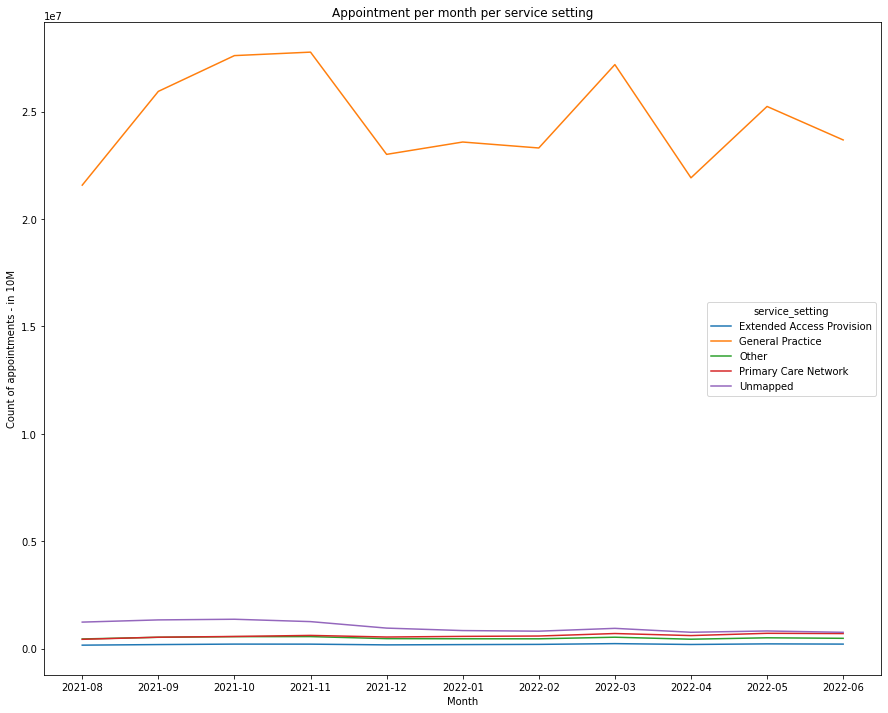

In [90]:
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
#create a lineplot 
sns.lineplot(x='appointment_month',y='count_of_appointments',hue='service_setting',data=nc_ss,ci=None)
# Set labels and title.
ax.set_xlabel("Month")
ax.set_ylabel("Count of appointments - in 10M")
ax.set_title("Appointment per month per service setting")

In [19]:
#the number of appointments per month for context types
nc_ct = national_categories.groupby(['appointment_month','context_type'])[['count_of_appointments']].sum()

nc_ct


count_of_appointments
appointment_month context_type                                 
2021-08           Care Related Encounter               20255235
                  Inconsistent Mapping                  2363093
                  Unmapped                              1233843
2021-09           Care Related Encounter               24404251
                  Inconsistent Mapping                  2782135
                  Unmapped                              1336115
2021-10           Care Related Encounter               26125201
                  Inconsistent Mapping                  2811977
                  Unmapped                              1366656
2021-11           Care Related Encounter               26282778
                  Inconsistent Mapping                  2865796
                  Unmapped                              1256496
2021-12           Care Related Encounter               21798612
                  Inconsistent Mapping                  2387907
                  Unmapped                               954257
2022-01           Care Related Encounter               22441947
                  Inconsistent Mapping                  2353965
                  Unmapped                               839562
2022-02           Care Related Encounter               22211021
                  Inconsistent Mapping                  2332993
                  Unmapped                               811246
2022-03           Care Related Encounter               25928850
                  Inconsistent Mapping                  2723276
                  Unmapped                               942912
2022-04           Care Related Encounter               20904193
                  Inconsistent Mapping                  2248554
                  Unmapped                               760313
2022-05           Care Related Encounter               24101243
                  Inconsistent Mapping                  2573495
                  Unmapped                               820770
2022-06           Care Related Encounter               22621827
                  Inconsistent Mapping                  2447611
                  Unmapped                               758640

Text(0.5, 1.0, 'Appointment per month per context type')

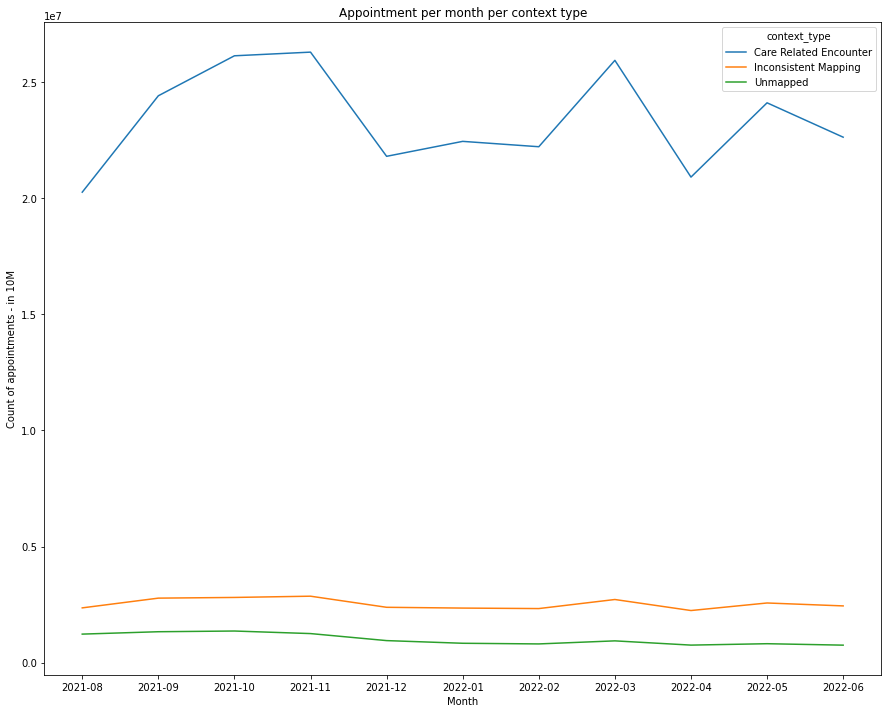

In [91]:
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
#create a lineplot for context types 
sns.lineplot(x='appointment_month',y='count_of_appointments',hue='context_type',data=nc_ct,ci=None)
# Set labels and title.
ax.set_xlabel("Month")
ax.set_ylabel("Count of appointments - in 10M")
ax.set_title("Appointment per month per context type")

In [21]:
#week 4 visual 3 
#the number of appointments per month for national categories 
nc_nc = national_categories.groupby(['appointment_month','national_category'])[['count_of_appointments']].sum()
nc_nc

count_of_appointments
appointment_month national_category                                                        
2021-08           Care Home Needs Assessment & Personalised Care ...                  29676
                  Care Home Visit                                                     47583
                  Clinical Triage                                                   3704207
                  General Consultation Acute                                        4280920
                  General Consultation Routine                                      7756045
...                                                                                     ...
2022-06           Social Prescribing Service                                          55066
                  Structured Medication Review                                       187800
                  Unmapped                                                           758640
                  Unplanned Clinical Activity                                        274491
                  Walk-in                                                             35935

[198 rows x 1 columns]

Text(0.5, 1.0, 'Appointment per month per national category')

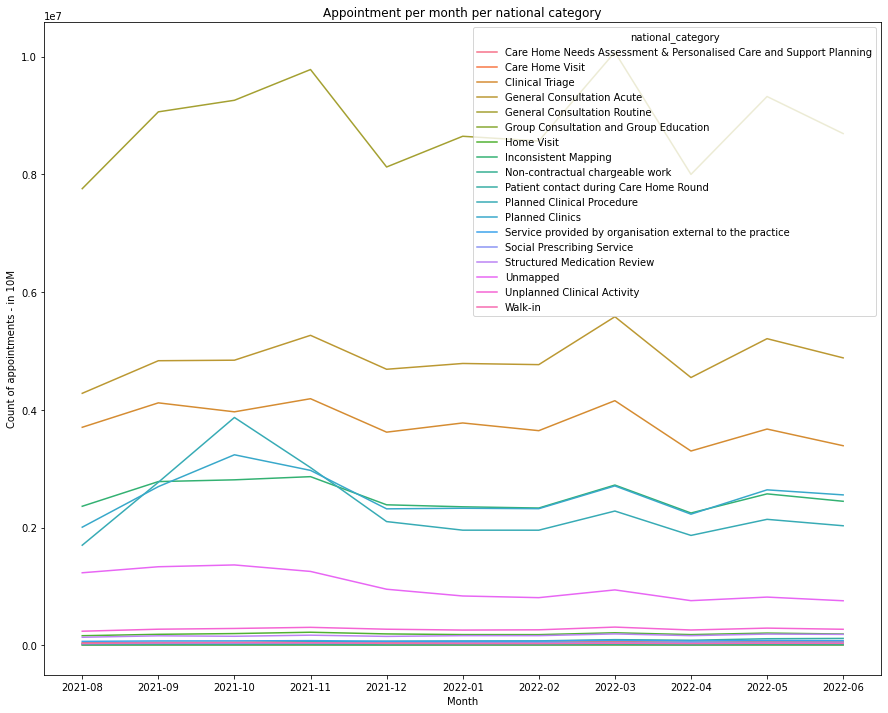

In [92]:
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
#create a lineplot for national category 
sns.lineplot(x='appointment_month',y='count_of_appointments',hue='national_category',data=nc_nc,ci=None)
# Set labels and title.
ax.set_xlabel("Month")
ax.set_ylabel("Count of appointments - in 10M")
ax.set_title("Appointment per month per national category")

In [118]:
#define the subset with the relevant months
nc_subset5 = national_categories.loc[national_categories['appointment_month'].isin(['2021-08','2021-10','2022-01','2022-04'])]
nc_subset5

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
815522,2022-04-30,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,General Consultation Routine,111,2022-04
815523,2022-04-30,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,General Consultation Acute,32,2022-04
815524,2022-04-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,10,2022-04
815525,2022-04-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,19,2022-04


In [119]:
#group the data by appointment month
nc_ss_x = nc_subset5.groupby(['appointment_month','service_setting'])[['count_of_appointments']].sum()
nc_ss_x

count_of_appointments
appointment_month service_setting                                 
2021-08           Extended Access Provision                 160927
                  General Practice                        21575852
                  Other                                     449101
                  Primary Care Network                      432448
                  Unmapped                                 1233843
2021-10           Extended Access Provision                 209539
                  General Practice                        27606171
                  Other                                     556487
                  Primary Care Network                      564981
                  Unmapped                                 1366656
2022-01           Extended Access Provision                 186375
                  General Practice                        23583053
                  Other                                     457440
                  Primary Care Network                      569044
                  Unmapped                                  839562
2022-04           Extended Access Provision                 192284
                  General Practice                        21916791
                  Other                                     437402
                  Primary Care Network                      606270
                  Unmapped                                  760313

Text(0.5, 1.0, 'Appointment per season per service setting')

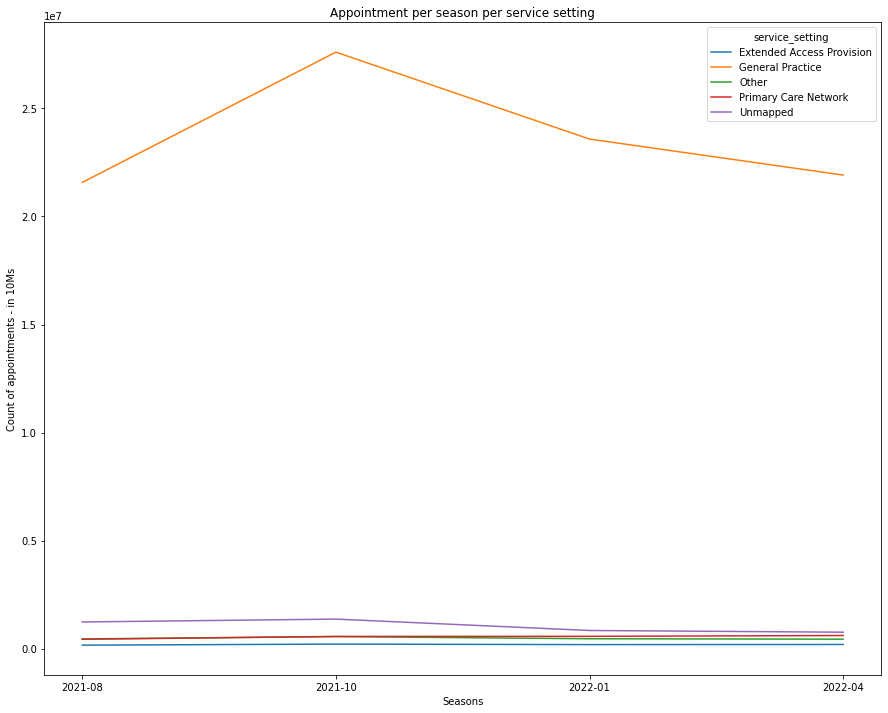

In [121]:
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
#create a lineplot for context types 
sns.lineplot(x='appointment_month',y='count_of_appointments',hue='service_setting',data=nc_ss_x,ci=None)
# Set labels and title.
ax.set_xlabel("Seasons")
ax.set_ylabel("Count of appointments - in 10Ms")
ax.set_title("Appointment per season per service setting")

# The sections below represent a breakdown of each season

In [75]:
#week 4 
#create the subset for summer
nc_x= (national_categories['appointment_month'] == '2021-08')
national_categories_sub1=national_categories.loc[nc_x]
national_categories_sub1

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
808176,2021-08-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Other,Care Related Encounter,Clinical Triage,20,2021-08
808177,2021-08-31,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Unplanned Clinical Activity,143,2021-08
808178,2021-08-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Primary Care Network,Care Related Encounter,Social Prescribing Service,7,2021-08
808179,2021-08-31,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Home Visit,36,2021-08


In [104]:
nc_ss1 = national_categories_sub1.groupby(['appointment_date','service_setting'])[['count_of_appointments']].sum()
nc_ss1

count_of_appointments
appointment_month service_setting                                 
2021-08           Extended Access Provision                 160927
                  General Practice                        21575852
                  Other                                     449101
                  Primary Care Network                      432448
                  Unmapped                                 1233843

Text(0.5, 1.0, "Appointment per day per service setting - Summer'21")

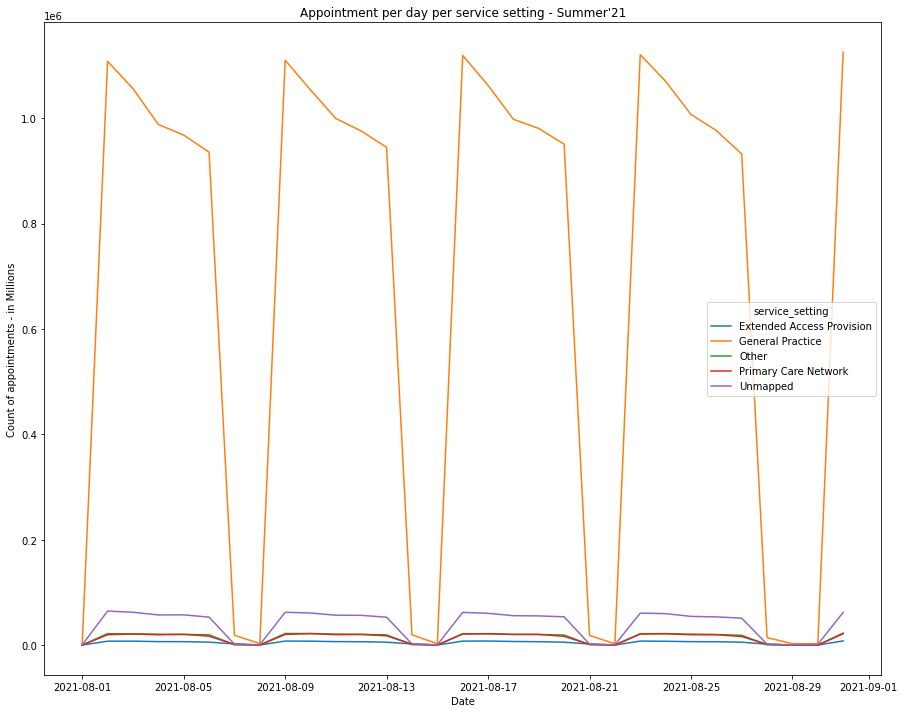

In [93]:
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
#create a lineplot for context types 
sns.lineplot(x='appointment_date',y='count_of_appointments',hue='service_setting',data=nc_ss1,ci=None)
# Set labels and title.
ax.set_xlabel("Date")
ax.set_ylabel("Count of appointments - in Millions")
ax.set_title("Appointment per day per service setting - Summer'21")

In [81]:
#create the subset for autumn
nc_y= (national_categories['appointment_month'] == '2021-10')
national_categories_sub2=national_categories.loc[nc_y]
national_categories_sub2

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
1315,2021-10-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Structured Medication Review,5,2021-10
1316,2021-10-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Service provided by organisation external to t...,1,2021-10
1317,2021-10-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinics,38,2021-10
1318,2021-10-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinical Procedure,42,2021-10
1319,2021-10-01,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Inconsistent Mapping,Inconsistent Mapping,27,2021-10
...,...,...,...,...,...,...,...,...
809993,2021-10-30,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Planned Clinical Procedure,620,2021-10
809994,2021-10-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,47,2021-10
809995,2021-10-30,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Planned Clinics,508,2021-10
809996,2021-10-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,3,2021-10


In [83]:
nc_ss2 = national_categories_sub2.groupby(['appointment_date','service_setting'])[['count_of_appointments']].sum()
nc_ss2

count_of_appointments
appointment_date service_setting                                 
2021-10-01       Extended Access Provision                   7107
                 General Practice                         1130646
                 Other                                      22639
                 Primary Care Network                       22974
                 Unmapped                                   56201
...                                                           ...
2021-10-31       Extended Access Provision                   1113
                 General Practice                           17449
                 Other                                       1147
                 Primary Care Network                        1200
                 Unmapped                                    2863

[155 rows x 1 columns]

Text(0.5, 1.0, "Appointment per day per service setting - Autumn'21")

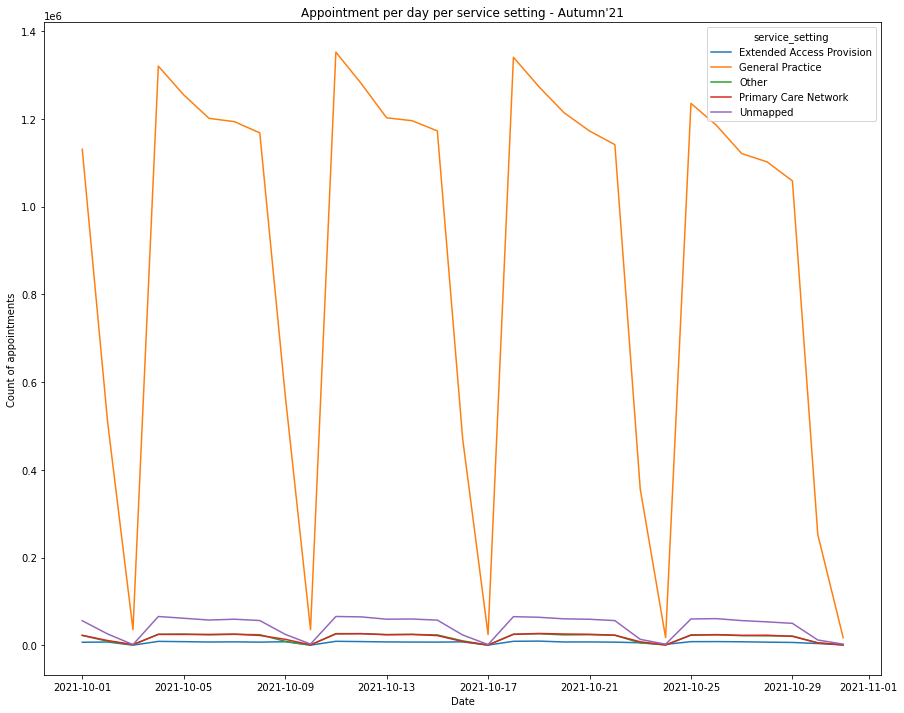

In [84]:
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
#create a lineplot for context types 
sns.lineplot(x='appointment_date',y='count_of_appointments',hue='service_setting',data=nc_ss2,ci=None)
# Set labels and title.
ax.set_xlabel("Date")
ax.set_ylabel("Count of appointments - in Millions")
ax.set_title("Appointment per day per service setting - Autumn'21")

In [94]:
#create the subset for winter
nc_z= (national_categories['appointment_month'] == '2022-01')
national_categories_sub3=national_categories.loc[nc_z]
national_categories_sub3

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
3273,2022-01-03,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Planned Clinics,10,2022-01
3274,2022-01-03,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Routine,1,2022-01
3275,2022-01-04,E54000050,NHS North East and North Cumbria ICB - 00L,Unmapped,Unmapped,Unmapped,141,2022-01
3276,2022-01-04,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinics,75,2022-01
3277,2022-01-04,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinical Procedure,11,2022-01
...,...,...,...,...,...,...,...,...
812754,2022-01-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,97,2022-01
812755,2022-01-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Home Visit,1,2022-01
812756,2022-01-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,10,2022-01
812757,2022-01-31,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Acute,32,2022-01


In [96]:
nc_ss3 = national_categories_sub3.groupby(['appointment_date','service_setting'])[['count_of_appointments']].sum()
nc_ss3

count_of_appointments
appointment_date service_setting                                 
2022-01-01       Extended Access Provision                    246
                 General Practice                            3578
                 Other                                        280
                 Primary Care Network                         215
                 Unmapped                                     572
...                                                           ...
2022-01-31       Extended Access Provision                   9962
                 General Practice                         1305082
                 Other                                      25034
                 Primary Care Network                       30509
                 Unmapped                                   43240

[155 rows x 1 columns]

Text(0.5, 1.0, "Appointment per day per service setting - Winter'22")

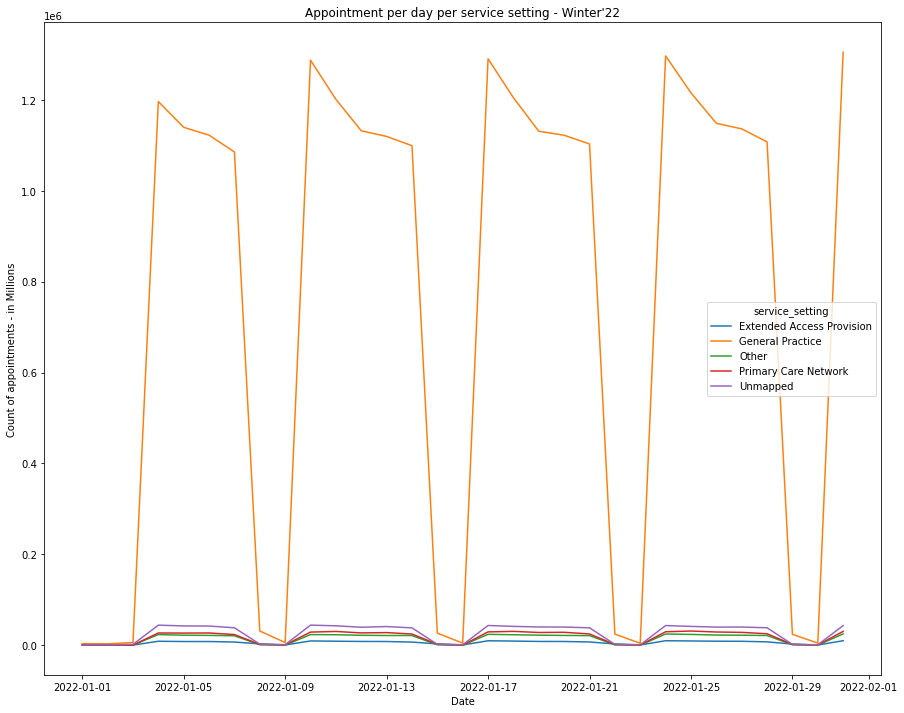

In [100]:
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
#create a lineplot for context types 
sns.lineplot(x='appointment_date',y='count_of_appointments',hue='service_setting',data=nc_ss3,ci=None)
# Set labels and title.
ax.set_xlabel("Date")
ax.set_ylabel("Count of appointments - in Millions")
ax.set_title("Appointment per day per service setting - Winter'22")

In [101]:
#create the subset for spring
nc_a= (national_categories['appointment_month'] == '2022-04')
national_categories_sub4=national_categories.loc[nc_a]
national_categories_sub4

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
5117,2022-04-01,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,68,2022-04
5118,2022-04-01,E54000050,NHS North East and North Cumbria ICB - 00L,Extended Access Provision,Care Related Encounter,Planned Clinics,2,2022-04
5119,2022-04-01,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Clinical Triage,953,2022-04
5120,2022-04-01,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Inconsistent Mapping,Inconsistent Mapping,715,2022-04
5121,2022-04-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Structured Medication Review,4,2022-04
...,...,...,...,...,...,...,...,...
815522,2022-04-30,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,General Consultation Routine,111,2022-04
815523,2022-04-30,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,General Consultation Acute,32,2022-04
815524,2022-04-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,10,2022-04
815525,2022-04-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,19,2022-04


In [102]:
nc_ss4 = national_categories_sub4.groupby(['appointment_date','service_setting'])[['count_of_appointments']].sum()
nc_ss4

count_of_appointments
appointment_date service_setting                                 
2022-04-01       Extended Access Provision                   8011
                 General Practice                         1085037
                 Other                                      21077
                 Primary Care Network                       26493
                 Unmapped                                   36836
...                                                           ...
2022-04-30       Extended Access Provision                   3416
                 General Practice                           23675
                 Other                                       1148
                 Primary Care Network                        3150
                 Unmapped                                    1844

[150 rows x 1 columns]

Text(0.5, 1.0, "Appointment per day per service setting - Spring'22")

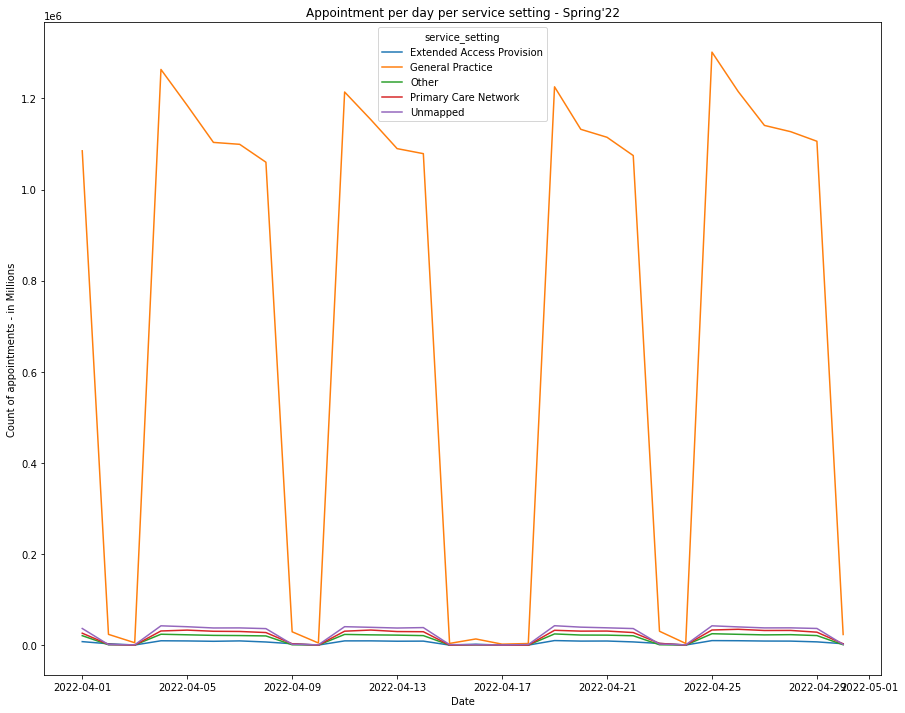

In [103]:
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
#create a lineplot for context types 
sns.lineplot(x='appointment_date',y='count_of_appointments',hue='service_setting',data=nc_ss4,ci=None)
# Set labels and title.
ax.set_xlabel("Date")
ax.set_ylabel("Count of appointments - in Millions")
ax.set_title("Appointment per day per service setting - Spring'22")